# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

https://github.com/ddwalk77/44620-mod7

### Student Name: DeeDee Walker

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

# Question 1

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [1]:
import requests
from bs4 import BeautifulSoup
import pickle

article_page = requests.get('https://www.cntraveler.com/story/best-places-to-go-in-2023')
article_html = article_page.text

with open('python-match.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

# Question 2

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [8]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

with open('python-match.pkl', 'rb') as f:
    article_html = pickle.load(f)

parser = 'html.parser'
soup = BeautifulSoup(article_html, parser)
article_element = soup.find('article')
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe("spacytextblob")
doc = nlp(article_element.get_text())
sentences = list(doc.sents)
print("Article Polarity: ", doc._.blob.polarity)
print("Article Sentence Count: ", len(sentences))

Article Polarity:  0.1780577210027673
Article Sentence Count:  255


# Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [17]:
from collections import Counter

def relevant(token):
    return not (token.is_space or token.is_punct or token.is_stop or token.is_digit)

common_tokens = [token.lower_ for token in doc if relevant(token)]
word_freq = Counter(map(str,common_tokens))
print("The 5 most frequent tokens in the article and their frequency: ", word_freq.most_common(5))

The 5 most frequent tokens in the article and their frequency:  [('new', 95), ('stay', 49), ('hotel', 33), ('year', 29), ('city', 26)]


# Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [18]:
common_lemmas = [token.lemma_.lower() for token in doc if relevant(token)]
lemma_freq = Counter(common_lemmas)
print("The 5 most frequent lemmas in the article and their frequency: ", lemma_freq.most_common(5))

The 5 most frequent lemmas in the article and their frequency:  [('new', 97), ('stay', 56), ('open', 54), ('hotel', 49), ('year', 41)]


# Question 5

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

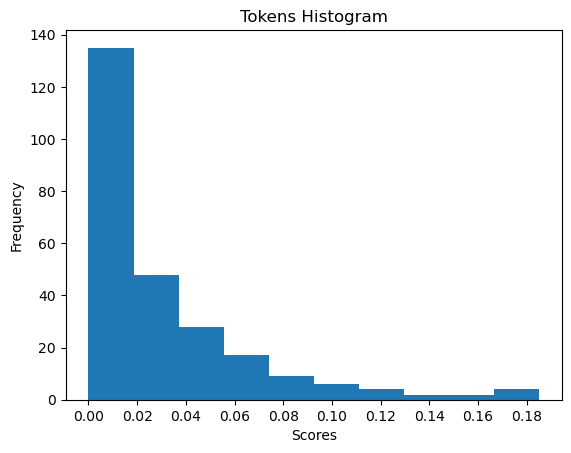

In [75]:
import matplotlib.pyplot as plt
import numpy as np

top_common_tokens = list()
for token, freq in word_freq.most_common(5):
    top_common_tokens.append(token)

sentkn = list()
senwrd = list()
tknscr = list()
for sentence in sentences:
    tokncount = 0
    swrdcount = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            swrdcount +=1
        if token.text.lower() in top_common_tokens:
            tokncount +=1
    sentkn.append(tokncount)
    senwrd.append(swrdcount)
    stscr = tokncount/swrdcount
    tknscr.append(stscr)

t = np.array(tknscr)
plt.hist(t)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Tokens Histogram')
plt.xticks(np.arange(0, .2, 0.02))
plt.show()

#### The most common token score range is in 0-.02

# Question 6

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

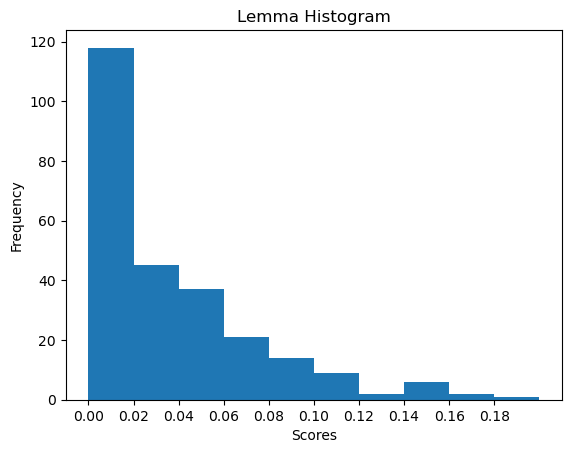

In [76]:
import matplotlib.pyplot as plt
import numpy as np

top_common_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    top_common_lemmas.add(lemma)

senlma = list()
senwrd = list()
lmascr = list()
for sentence in sentences:
    lmacount = 0
    swrdcount = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            swrdcount +=1
        if token.lemma_.lower() in top_common_lemmas:
            lmacount +=1
    senlma.append(lmacount)
    senwrd.append(swrdcount)
    slscr = lmacount/swrdcount
    lmascr.append(slscr)

l = np.array(lmascr)
plt.hist(l)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Lemma Histogram')
plt.xticks(np.arange(0, .2, 0.02))
plt.show()

#### The most common lemma score range is in 0-.02

# Question 7

In [86]:
top_idx_t = np.argsort(t)[-10:]
top_values_t = [t[i] for i in top_idx_t]
print(min(top_values_t))

top_idx_l = np.argsort(l)[-10:]
top_values_l = [l[i] for i in top_idx_l]
print(min(top_values_l))

0.11764705882352941
0.13636363636363635


7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.11764705882352941
* Cutoff Score (lemmas): 0.13636363636363635

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

# Question 8

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [104]:
tsummary = list()
tsumscores = list()

for sentence in sentences:
    tcount = 0
    scount = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            scount += 1
        if token.text.lower() in top_common_tokens:
            tcount += 1
    if tcount != 0:
        tscore = tcount/scount
        if tscore >= min(top_values_t):
            sent_str = str(sentence).replace('\n','').replace('  ',' ')
            tsummary.append(sent_str)
            tsumscores.append(tscore)

print(' '.join(tsummary))

Joe ThomasIn June 2023, Qantas will begin running non-stop flights from New York City to Auckland.  After a three-year hiatus, the popular Lantern Festival will be held in February 2023 to celebrate Chinese New Year. There’s the Park Hyatt, QT Auckland, the charming Hotel Fitzroy, and Hotel Britomart, New Zealand’s only 5-Green-Star certified hotel. Grander transformations are afoot, with new infrastructure—and a new capital—rapidly taking shape. In the leafy Hivernage neighborhood, home to some of the city’s best nightlife, a new Nobu hotel will breathe new life into the former Pearl Hotel. —Nicola ChiltonBook a stay at Caravan AgafayBook a stay at Nobu Hotel MarrakechMelides, PortugalGo for: Lesser-known beaches, design-forward —Abigail MalbonBook a stay at SpatiaBook a stay at Pa.te.osMemphis, TennesseeGo for: New public spaces, restaurants and hotels that highlight the city's heritageThe Memphian Hotel is an eye-catching marker of the city's hotel boom—it's just one of eight new pr

# Question 9

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [105]:
doc = nlp(' '.join(tsummary))

print("Token summary polarity: ", doc._.blob.polarity)
print(tsumscores)
print("Token summary sentence count: ", len(tsummary))

Token summary polarity:  0.2333333333333333
[0.11764705882352941, 0.15, 0.17391304347826086, 0.14285714285714285, 0.18518518518518517, 0.15, 0.16666666666666666, 0.17391304347826086, 0.11764705882352941, 0.14285714285714285]
Token summary sentence count:  10


# Question 10

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [106]:
lsummary = list()
lsumscores = list()

for sentence in sentences:
    lcount = 0
    scount = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            scount += 1
        if token.lemma_.lower() in top_common_lemmas:
            lcount += 1
    if lcount != 0:
        lscore = lcount/scount
        if lscore >= min(top_values_l):
            sent_str = str(sentence).replace('\n','').replace('  ',' ')
            lsummary.append(sent_str)
            lsumscores.append(lscore)

print(' '.join(lsummary))

After a three-year hiatus, the popular Lantern Festival will be held in February 2023 to celebrate Chinese New Year. There’s the Park Hyatt, QT Auckland, the charming Hotel Fitzroy, and Hotel Britomart, New Zealand’s only 5-Green-Star certified hotel. Grander transformations are afoot, with new infrastructure—and a new capital—rapidly taking shape. In the leafy Hivernage neighborhood, home to some of the city’s best nightlife, a new Nobu hotel will breathe new life into the former Pearl Hotel. —Nicola ChiltonBook a stay at Caravan AgafayBook a stay at Nobu Hotel MarrakechMelides, PortugalGo for: Lesser-known beaches, design-forward —Abigail MalbonBook a stay at SpatiaBook a stay at Pa.te.osMemphis, TennesseeGo for: New public spaces, restaurants and hotels that highlight the city's heritageThe Memphian Hotel is an eye-catching marker of the city's hotel boom—it's just one of eight new properties opened in 2022.  These join a new luxury hotel faction including The Langham Gold Coast and

# Question 11

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [107]:
doc = nlp(' '.join(lsummary))

print("Lemma summary polarity: ", doc._.blob.polarity)
print(lsumscores)
print("Lemma summary sentence count: ", len(lsummary))

Lemma summary polarity:  0.23636363636363633
[0.15, 0.17391304347826086, 0.14285714285714285, 0.14814814814814814, 0.15, 0.16666666666666666, 0.13636363636363635, 0.2, 0.15, 0.14285714285714285]
Lemma summary sentence count:  10


# Question 12

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

##### The polarity of the token & lemma summary are nearly the same, but both are higher than the original polarity. I think the polarity of the summary seems more accurate as the article is about travel and should have a more positive polarity score

# Question 13

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

##### Neither summary is better than the other. Both have too many names of people which adds some confusion to the summary.